In [1]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df_t = pd.read_csv('/content/test.csv')

In [2]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<Axes: >

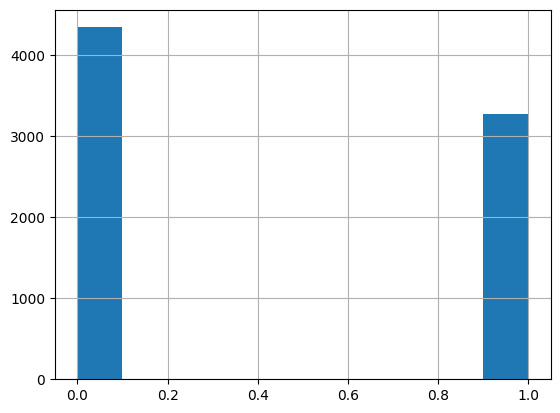

In [3]:
df['target'].hist()
#as the data is a bit balanced it is fine to proceed

In [4]:
#we need to remove any hastags and other symbols from text
df[1000:1200]

,id,keyword,location,text,target
1000,1452,body%20bagging,NaN,#OVOFest Drake straight body bagging Meek on t...,0
1001,1453,body%20bagging,NaN,I'm not a Drake fan but I enjoy seeing him bod...,0
1002,1454,body%20bagging,NaN,@amaramin3 Meek is definitely capable of body ...,0
1003,1455,body%20bagging,3?3?7?SLOPelousas??2?2?5?,Gates not body bagging nobody???????? niggas i...,0
1004,1456,body%20bagging,NaN,WWE 2k15 MyCareer EP18 Tyrone body bagging dud...,0
...,...,...,...,...,...
1195,1721,buildings%20burning,NaN,@SonofLiberty357 all illuminated by the bright...,0
1196,1722,buildings%20burning,NaN,'i'm a Gemini' *children screaming buildings b...,1
1197,1723,buildings%20burning,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I...,1
1198,1724,buildings%20burning,Quincy MA,@DougMartin17 Fireman Ed runs into burning bui...,1


In [5]:
import nltk
from nltk.tokenize import RegexpTokenizer

import re



def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    clean = re.sub(r'(\s)?@\w+', r'\1', sentence)
    sentence=clean.replace('{html}',"") 
    # cleanr = re.compile('<.*?>')
    # cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',sentence)
    # rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_url)  
    
    return " ".join(tokens) 


df['cleanText']=df['text'].map(lambda s:preprocess(s))

In [6]:
df_t['cleanText']=df_t['text'].map(lambda s:preprocess(s))

In [7]:
df_t.iloc[3].cleanText

'apocalypse lighting spokane wildfires'

In [8]:
df2 = df.rename({'target':'label'}, axis='columns')

In [9]:
df_test = df_t.rename({'target':'label'}, axis='columns')

In [10]:
df_test

,id,keyword,location,text,cleanText
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles ûò safety fasten...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane my city ...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo


In [11]:
part = df[100:190]

In [12]:
part.iloc[6].cleanText


'320 ir icemoon aftershock dubstep trapmusic dnb edm dance ices û_'

In [13]:
part.iloc[6].text

'320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #Ices\x89Û_ http://t.co/zEVakJaPcz'

In [14]:
len(part[(part['keyword'] == 'damage')])

0

In [15]:
dd = part[(part['keyword'] == 'damage') & part['target'] == 0]

In [16]:
dd.iloc[10].target

0

In [17]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 36.6 MB/s eta 0:00:0

In [18]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
from datasets import Dataset, DatasetDict
import torch
from transformers.modeling_outputs import TokenClassifierOutput
from torch import nn
from datasets import load_dataset,Dataset,DatasetDict
from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [25]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'label', 'cleanText'],
        num_rows: 7613
    })
})

In [21]:
dataset = Dataset.from_pandas(df2)

In [22]:
dataset_t = Dataset.from_pandas(df_test)

In [ ]:
data = DatasetDict({
    'train': dataset})

In [ ]:
data_t = DatasetDict({
    'test': dataset_t})

In [26]:
def tokenization(example):
    return tokenizer(example["cleanText"])

dataset = data.map(tokenization, batched=True)

Map:   0%|          | 0/7613 [00:00<?, ? examples/s]

In [27]:
def tokenization(example):
    return tokenizer(example["cleanText"])

dataset_t = data_t.map(tokenization, batched=True)

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [28]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'label', 'cleanText', 'input_ids', 'attention_mask'],
        num_rows: 7613
    })
})

In [29]:
dataset_t

DatasetDict({
    test: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'cleanText', 'input_ids', 'attention_mask'],
        num_rows: 3263
    })
})

In [30]:
dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [31]:
dataset_t.set_format(type='torch', columns=['input_ids', 'attention_mask'])
eval_dataloader = torch.utils.data.DataLoader(dataset_t, batch_size=32)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [32]:
eval_dataloader

In [34]:
model = AutoModel.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing RobertaModel: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels): 
    super(CustomModel,self).__init__() 
    self.num_labels = num_labels 

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint)
    self.dropout = nn.Dropout(0.1) 
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses
    
    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
      
    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions), logits

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint='cardiffnlp/twitter-roberta-base-sentiment',num_labels=2).to(device)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing RobertaModel: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset["train"], shuffle=True, batch_size=32, collate_fn=data_collator
)


In [38]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(
    dataset_t["test"], shuffle=False, batch_size=1000, collate_fn=data_collator
)

In [39]:
len(dataset_t["test"])

3263

In [40]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 10
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=100,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

2380


/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
lens = 0
accu_loss = 0
avg_loss = 0
for epoch in range(num_epochs):
  model.train()
  for batch in train_dataloader:
      lens = lens + 1
      batch = {k: v.to(device) for k, v in batch.items()}
      outputs,_ = model(**batch)
      loss = outputs.loss
      
      loss.backward()
      
     
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
  
  print("the loss of the model after epoch " + str(epoch) +" is "+ str(loss))

# model.eval()
# for batch in eval_dataloader:
#     batch = {k: v.to(device) for k, v in batch.items()}
#     with torch.no_grad():
#         outputs = model(**batch)

#     logits = outputs.logits
#     predictions = torch.argmax(logits, dim=-1)
#     metric.add_batch(predictions=predictions, references=batch["labels"])
#     progress_bar_eval.update(1)
    
#   print(metric.compute())

You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


the loss of the model after epoch 0 is tensor(0.4129, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 1 is tensor(0.1739, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 2 is tensor(0.1291, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 3 is tensor(0.0540, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 4 is tensor(0.0492, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 5 is tensor(0.0322, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 6 is tensor(0.0348, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 7 is tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 8 is tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
the loss of the model after epoch 9 is tensor(0.0944, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
torch.save(model, '/content/model.pth')

In [ ]:
model=CustomModel(checkpoint='',num_labels=2).to(device)

In [ ]:
model = torch.load('/content/model.pth')

In [ ]:
model.eval()
predictionss = []
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs,logits = model(**batch)

    logits = logits
    
    predictions = torch.argmax(logits, dim=-1).cpu().detach().numpy()
    predictionss.extend(predictions)
    
  

In [ ]:
len(predictionss)

3263

In [ ]:
df_t.iloc[2].cleanText

'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all'

In [ ]:
predictionss

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,


In [ ]:
predictions)

numpy.ndarray

In [ ]:
import numpy

numpy.savetxt("/content/foo.csv", predictionss)